In [1]:
import math
import matplotlib.pyplot as plt

PLOTS UNDER REVIEW

EOQ

In [2]:
def EOQ(D,A,H):
    Qstar = math.ceil(math.sqrt(2*D*A/H))
    tau = math.ceil(Qstar/D*365)
    aoc = D/Qstar*A
    ahc = Qstar/2*H
    tic = aoc+ahc
    print("EOQ :",Qstar)
    print("Average Inventory :",Qstar/2)
    print("Cycle time :",tau,"Days")
    print("Total inventory cost :",tic)
    #PLOTTING
    X = [0, tau]
    while X[-1] < 365:
        X.append(X[-1])
        X.append(X[-1]+tau)
    Y = [Qstar, 0]
    while len(Y) < len(X):
        Y.append(Qstar)
        Y.append(0)
    plt.figure(figsize=(16,9))
    plt.plot(X,Y)
    plt.plot([0,X[-1]],[Qstar/2,Qstar/2],linestyle="dashed", label="Average Inventory")
    plt.xlabel("Days")
    plt.ylabel("Inventory Level")
    plt.title("Economic Order Quantity")
    plt.legend()
    plt.grid(True)


EOQ : 358
Average Inventory : 179.0
Cycle time : 27 Days
Total inventory cost : 714.1452513966481


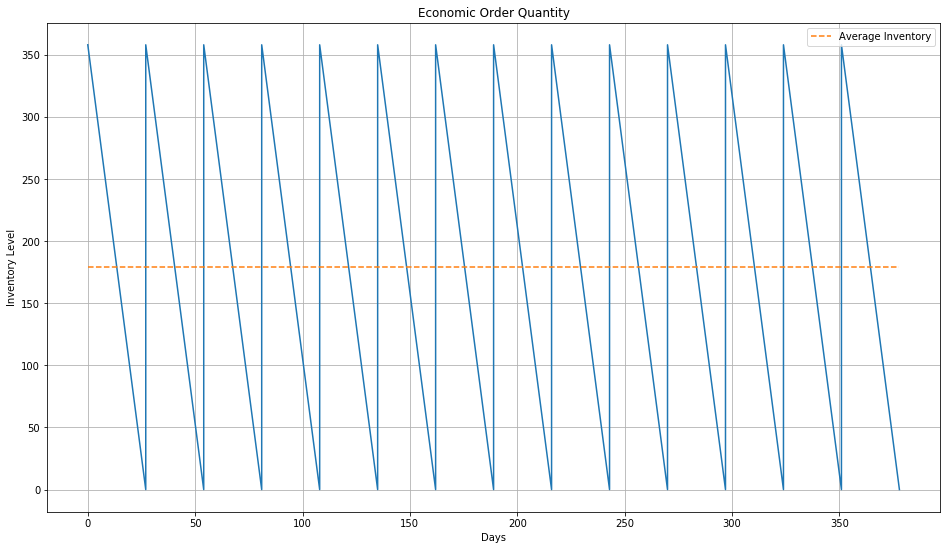

In [3]:
EOQ(5000,25.50,2)

EOQ W BACKORDERS

In [4]:
def EOQS(D,A,H,S):
    Qstar = math.ceil(math.sqrt(2*D*A*(H+S)/(H*S)))
    tau = math.ceil(Qstar/D*365)
    b= math.ceil(Qstar*(H/(H+S)))
    Td=math.ceil(((Qstar-b)/D)*365)
    Tb=math.ceil((b/D)*365)
    tsc=S*(b**2/(2*Qstar))
    tcc=H*((Qstar-b)**2/(2*Qstar))
    toc=A*(D/Qstar)
    tic=tsc+tcc+toc
    print("EOQ :",Qstar)
    print("Opt Backorder :",b)
    print("Time during which demand is met :",Td)
    print("Time during which demand is Backordered:",Tb)
    print("Cycle time :",tau,"Days")
    print("Total inventory cost :",tic)
    #PLOTTING
    X = [0, tau]
    while X[-1] < 365:
        X.append(X[-1])
        X.append(X[-1]+tau)
    Y = [Qstar, 0]
    while len(Y) < len(X):
        Y.append(Qstar)
        Y.append(0)
    plt.figure(figsize=(16,9))
    plt.plot(X,Y)
    plt.plot([0,X[-1]],[b,b],linestyle="dashed", label="Backorder")
    plt.xlabel("Days")
    plt.ylabel("Inventory Level")
    plt.title("Economic Order Quantity W Backorders")
    plt.legend()
    plt.grid(True)
    
    

EOQ : 2346
Opt Backorder : 640
Time during which demand is met : 63
Time during which demand is Backordered: 24
Cycle time : 86 Days
Total inventory cost : 1279.2043904518328


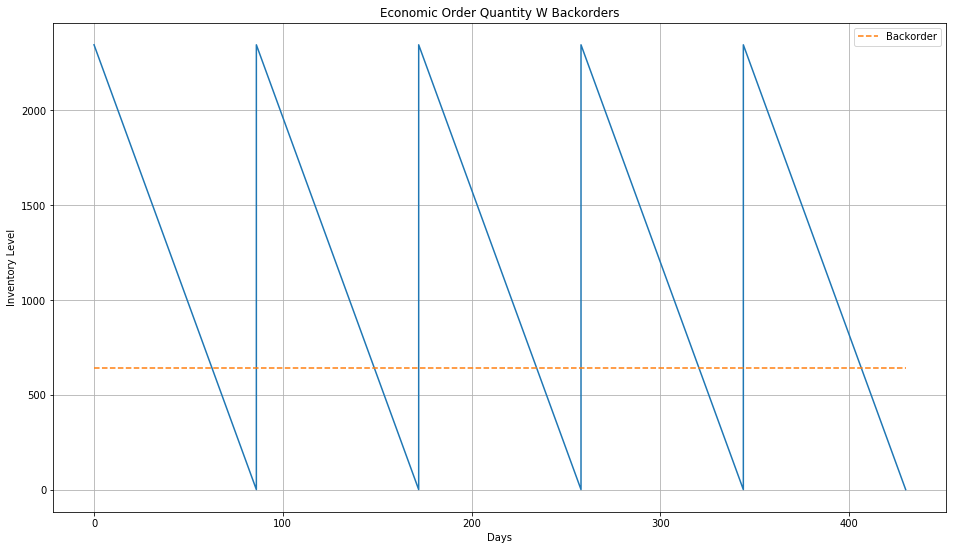

In [5]:
EOQS(10000,150,.75,2)

EPQ

In [6]:
def EPQ(D,A,H,P):
    Qstar = math.ceil(math.sqrt((2*D*A)/(H*(1-(D/P)))))
    tau = math.ceil(Qstar/D*365)
    npr = D/Qstar
    apc = npr*A
    ahc = Qstar/2*(1-(D/P))*H
    tic=apc+ahc
    Imax = math.ceil(Qstar*(1-(D/P)))
    print("EPQ :",Qstar)
    print("Max Inventory :",Imax)
    print("Average Inventory :",math.ceil(Imax/2))
    print("Cycle time :",tau,"Days")
    print("Total inventory cost :",tic)
    X = [0]
    while X[-1] < 365:
        X.append(X[-1] + math.ceil(Qstar/P*365))
        X.append(X[-1] + math.ceil((Qstar/D-Qstar/P)*365))
    Y = [0]
    while len(Y) < len(X):
        Y.append(Imax)
        Y.append(0)
    plt.figure(figsize=(16,9))
    plt.plot(X,Y)
    plt.plot([0,(Qstar/P*365)],[0,Qstar], linestyle="dashed", label="Production Rate")
    plt.plot([0,X[-1]],[Imax,Imax],linestyle="dashed", label="Max Inventory")
    plt.plot([0,X[-1]],[math.ceil(Imax/2),math.ceil(Imax/2)],linestyle="dashed", label="Average Inventory")
    plt.xlabel("Days")
    plt.ylabel("Inventory Level")
    plt.title("Economic Production Quantity")
    plt.legend()
    plt.grid(True)
    

    

EPQ : 142
Max Inventory : 29
Average Inventory : 15
Cycle time : 65 Days
Total inventory cost : 113.13802816901406


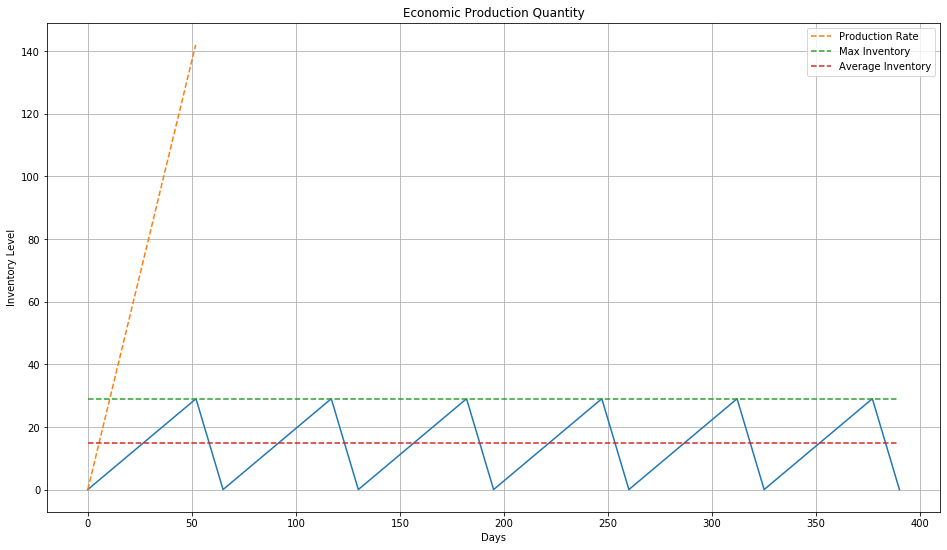

In [7]:
EPQ(800,10,4,1000)